# Визуализация данных
[matplotlib](https://matplotlib.org/) - Python-библиотека для визуализации данных.  
[seaborn](https://seaborn.pydata.org/index.html) — это библиотека для создания статистических графиков на Python. 
Она основывается на `matplotlib` и тесно взаимодействует со структурами данных `pandas`.

Гайды по `matplotlib`:
- [Quick start guide](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)
- [Pyplot tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)
- [Examples](https://matplotlib.org/stable/gallery/index.html)
- [Краткое руководство по Matplotlib](https://pyprog.pro/mpl/mpl_short_guide.html)
- [Interactive Plotting](https://ipython.readthedocs.io/en/stable/interactive/plotting.html)
- [matplotlib.pyplot.ion](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ion.html)

Гайды по `seaborn`:
- [Tutorial](https://seaborn.pydata.org/tutorial.html)
- [Visualizing categorical data](https://seaborn.pydata.org/tutorial/categorical.html)

Гайды по `pandas`:
- [pandas.DataFrame.plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
- [Chart visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

Гайды:
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/ru/company/ods/blog/323210/)

In [1]:
import pandas as pd
import numpy as np
# magic function - см. Interactive Plotting
%matplotlib inline
%matplotlib widget
from ipywidgets import *
import matplotlib.pyplot as plt
# см. https://ipython.readthedocs.io/en/stable/interactive/plotting.html
# Starting with IPython 5.0 and matplotlib 2.0 you can avoid the use of IPython’s specific magic 
# and use matplotlib.pyplot.ion()/matplotlib.pyplot.ioff() which have the advantages of working outside of IPython as well.
# plt.ion()
import seaborn as sns

## Датасет

In [2]:
from pathlib import Path
# путь к папке с данными
data_path = "../JPL/data"
# датасет: Goodreads Books - 31 Features: https://www.kaggle.com/datasets/austinreese/goodreads-books
df = pd.read_csv(Path(data_path, 'goodreads_books.csv'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52199 entries, 0 to 52198
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      52199 non-null  int64  
 1   title                   52199 non-null  object 
 2   link                    52199 non-null  object 
 3   series                  23319 non-null  object 
 4   cover_link              51592 non-null  object 
 5   author                  52199 non-null  object 
 6   author_link             52199 non-null  object 
 7   rating_count            52199 non-null  int64  
 8   review_count            52199 non-null  int64  
 9   average_rating          52199 non-null  float64
 10  five_star_ratings       52199 non-null  int64  
 11  four_star_ratings       52199 non-null  int64  
 12  three_star_ratings      52199 non-null  int64  
 13  two_star_ratings        52199 non-null  int64  
 14  one_star_ratings        52199 non-null

### Подготовка данных
#### Дропаем ненужное

In [3]:
df.drop(columns=['settings', 'amazon_redirect_link', 'worldcat_redirect_link', 
                 'recommended_books', 'asin', 'link', 'author_link', 'cover_link', 'original_title'], inplace=True)

#### Парсим год выхода

In [4]:
df['year_published'] = df['date_published'].str.extract(r'(\d{4})')
df = df.drop(df[df['year_published'].isna()].index)
df['year_published'] = df['year_published'].astype(int)
# дропаем дату выхода
df.drop(columns=['date_published'], inplace=True)

#### Удаляем скобки в столбце `series`

In [5]:
df.head()

,id,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,...,number_of_pages,publisher,genre_and_votes,isbn,isbn13,characters,awards,books_in_series,description,year_published
0,630104,Inner Circle,(Private #5),"Kate Brian, Julian Peploe",7597,196,4.03,3045,2323,1748,...,220.0,Simon Schuster Books for Young Readers,"Young Adult 161, Mystery 45, Romance 32",1416950419,9781416950417,NaN,NaN,"381489, 381501, 352428, 630103, 1783281, 17832...",Reed Brennan arrived at Easton Academy expecti...,2007
1,9487,A Time to Embrace,(Timeless Love #2),Karen Kingsbury,4179,177,4.35,2255,1290,518,...,400.0,Thomas Nelson,"Christian Fiction 114, Christian 45, Fiction 3...",1595542329,9781595542328,NaN,NaN,115036,"Ideje az Ã¶lelÃ©snek TÃ¶rtÃ©net a remÃ©nyrÅl,...",2006
2,6050894,Take Two,(Above the Line #2),Karen Kingsbury,6288,218,4.23,3000,2020,1041,...,320.0,Zondervan,"Christian Fiction 174, Christian 81, Fiction 58",NaN,NaN,NaN,NaN,"4010795, 40792877, 7306261",Filmmakers Chase Ryan and Keith Ellison have c...,2009
3,39030,Reliquary,(Pendergast #2),"Douglas Preston, Lincoln Child",38382,1424,4.01,12711,15407,8511,...,464.0,Tor Books,"Thriller 626, Mystery 493, Horror 432, Fiction...",0765354950,9780765354952,"Aloysius X.L. Pendergast, Margo Green, William...",NaN,"67035, 39031, 39033, 136637, 136638, 30068, 39...",NaN,1997
4,998,The Millionaire Next Door: The Surprising Secr...,NaN,"Thomas J. Stanley, William D. Danko",72168,3217,4.04,27594,25219,14855,...,258.0,Gallery Books,"Economics-Finance 1162, Nonfiction 910, Busine...",0671015206,9780671015206,NaN,Independent Publisher Book Award (IPPY) Nomine...,NaN,The incredible national bestseller that is cha...,1995


In [6]:
df['series'] = df['series'].str.strip('()')

In [7]:
df.head()

,id,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,...,number_of_pages,publisher,genre_and_votes,isbn,isbn13,characters,awards,books_in_series,description,year_published
0,630104,Inner Circle,Private #5,"Kate Brian, Julian Peploe",7597,196,4.03,3045,2323,1748,...,220.0,Simon Schuster Books for Young Readers,"Young Adult 161, Mystery 45, Romance 32",1416950419,9781416950417,NaN,NaN,"381489, 381501, 352428, 630103, 1783281, 17832...",Reed Brennan arrived at Easton Academy expecti...,2007
1,9487,A Time to Embrace,Timeless Love #2,Karen Kingsbury,4179,177,4.35,2255,1290,518,...,400.0,Thomas Nelson,"Christian Fiction 114, Christian 45, Fiction 3...",1595542329,9781595542328,NaN,NaN,115036,"Ideje az Ã¶lelÃ©snek TÃ¶rtÃ©net a remÃ©nyrÅl,...",2006
2,6050894,Take Two,Above the Line #2,Karen Kingsbury,6288,218,4.23,3000,2020,1041,...,320.0,Zondervan,"Christian Fiction 174, Christian 81, Fiction 58",NaN,NaN,NaN,NaN,"4010795, 40792877, 7306261",Filmmakers Chase Ryan and Keith Ellison have c...,2009
3,39030,Reliquary,Pendergast #2,"Douglas Preston, Lincoln Child",38382,1424,4.01,12711,15407,8511,...,464.0,Tor Books,"Thriller 626, Mystery 493, Horror 432, Fiction...",0765354950,9780765354952,"Aloysius X.L. Pendergast, Margo Green, William...",NaN,"67035, 39031, 39033, 136637, 136638, 30068, 39...",NaN,1997
4,998,The Millionaire Next Door: The Surprising Secr...,NaN,"Thomas J. Stanley, William D. Danko",72168,3217,4.04,27594,25219,14855,...,258.0,Gallery Books,"Economics-Finance 1162, Nonfiction 910, Busine...",0671015206,9780671015206,NaN,Independent Publisher Book Award (IPPY) Nomine...,NaN,The incredible national bestseller that is cha...,1995


#### `books_in_series`

In [8]:
df['books_in_series_count'] = [len([idx for idx in x.split(',')])
                               if pd.notna(x) 
                               else 0 
                               for x in df['books_in_series']]
df['books_in_series_count'] += 1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51190 entries, 0 to 52198
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     51190 non-null  int64  
 1   title                  51190 non-null  object 
 2   series                 23034 non-null  object 
 3   author                 51190 non-null  object 
 4   rating_count           51190 non-null  int64  
 5   review_count           51190 non-null  int64  
 6   average_rating         51190 non-null  float64
 7   five_star_ratings      51190 non-null  int64  
 8   four_star_ratings      51190 non-null  int64  
 9   three_star_ratings     51190 non-null  int64  
 10  two_star_ratings       51190 non-null  int64  
 11  one_star_ratings       51190 non-null  int64  
 12  number_of_pages        49530 non-null  float64
 13  publisher              48246 non-null  object 
 14  genre_and_votes        48562 non-null  object 
 15  is

In [10]:
len(df[df['books_in_series_count'] > 1])

21843

#### `awards`

In [11]:
df['awards'] = df['awards'].str.replace(r"\(\d+\)","")
awards = df['awards'].value_counts().index.tolist()
df['awards_count'] = [len([idx for idx in x.split(',')])
                      if pd.notna(x) 
                      else 0 
                      for x in df['awards']]

C:\Users\UD\AppData\Local\Temp\ipykernel_47608\1425368446.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['awards'] = df['awards'].str.replace(r"\(\d+\)","")


In [12]:
df.describe()

,id,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,year_published,books_in_series_count,awards_count
count,5.119000e+04,5.119000e+04,51190.000000,51190.000000,5.119000e+04,5.119000e+04,51190.000000,51190.000000,51190.000000,49530.000000,51190.000000,51190.000000,51190.000000
mean,1.006206e+07,1.915640e+04,1029.821782,4.018992,7.938148e+03,6.346073e+03,3504.834890,948.036902,419.312248,328.876903,1993.810588,3.170131,0.435866
std,1.160727e+07,1.174288e+05,4091.579822,0.360603,5.931427e+04,3.503733e+04,18388.612424,5934.355694,3876.960410,251.596301,49.547182,3.330028,1.252281
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1000.000000,1.000000,0.000000
25%,3.528122e+05,3.680000e+02,33.000000,3.820000,1.270000e+02,1.180000e+02,68.000000,17.000000,6.000000,212.000000,1993.000000,1.000000,0.000000
50%,6.339134e+06,2.384000e+03,169.000000,4.030000,8.370000e+02,7.960000e+02,470.000000,111.000000,38.000000,304.000000,2007.000000,1.000000,0.000000
75%,1.733333e+07,9.516750e+03,638.000000,4.220000,3.451000e+03,3.266000e+03,1908.000000,460.000000,154.000000,392.000000,2012.000000,4.000000,0.000000
max,5.444299e+07,6.801077e+06,169511.000000,5.000000,4.414877e+06,1.868421e+06,980183.000000,529060.000000,537793.000000,14777.000000,2021.000000,11.000000,40.000000


In [13]:
df.loc[df['awards_count'].idxmax(), ['title', 'awards', 'awards_count']]

title                                            The Hunger Games
awards          Locus Award Nominee for Best Young Adult Book ...
awards_count                                                   40
Name: 41514, dtype: object

#### `author`

In [14]:
df['author'] = [[idx for idx in x.split(',')] for x in df['author']]
df['author']

0                         [Kate Brian,  Julian Peploe]
1                                    [Karen Kingsbury]
2                                    [Karen Kingsbury]
3                    [Douglas Preston,  Lincoln Child]
4               [Thomas J. Stanley,  William D. Danko]
                             ...                      
52194                                     [Sylvia Day]
52195                                  [Marina Keegan]
52196                                  [Karl Bruckner]
52197                                     [Kate Brian]
52198    [Sarah Palin,  Lynn Vincent,  Dewey Whetsell]
Name: author, Length: 51190, dtype: object

In [15]:
df.dropna(subset=['genre_and_votes'], inplace = True)
df.genre_and_votes = df.genre_and_votes.str.replace('\d+', '')
df.genre_and_votes = df.genre_and_votes.str.replace('user', '')
df.genre_and_votes = df.genre_and_votes.str.replace(' ', '')
df['genre_and_votes'] = [[idx[:-1] if idx.endswith('-') else idx for idx in x.split(',')] 
                         for x in df['genre_and_votes']]
df.rename(columns = {'genre_and_votes' : 'genre'}, inplace = True)

C:\Users\UD\AppData\Local\Temp\ipykernel_47608\1216389170.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.genre_and_votes = df.genre_and_votes.str.replace('\d+', '')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48562 entries, 0 to 52198
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     48562 non-null  int64  
 1   title                  48562 non-null  object 
 2   series                 22734 non-null  object 
 3   author                 48562 non-null  object 
 4   rating_count           48562 non-null  int64  
 5   review_count           48562 non-null  int64  
 6   average_rating         48562 non-null  float64
 7   five_star_ratings      48562 non-null  int64  
 8   four_star_ratings      48562 non-null  int64  
 9   three_star_ratings     48562 non-null  int64  
 10  two_star_ratings       48562 non-null  int64  
 11  one_star_ratings       48562 non-null  int64  
 12  number_of_pages        47213 non-null  float64
 13  publisher              46075 non-null  object 
 14  genre                  48562 non-null  object 
 15  is

### Let's plot
#### Количественные признаки
##### Сгруппируем оценки пользователей по годам выхода книжного издания

In [17]:
df_ratings = df.groupby('year_published') \
    .agg({'rating_count' : 'sum', 
          'five_star_ratings' : 'sum', 
          'four_star_ratings': 'sum', 
          'three_star_ratings': 'sum', 
          'two_star_ratings': 'sum',
          'one_star_ratings': 'sum'}) \
    .reset_index()

In [18]:
df_ratings.describe()

,year_published,rating_count,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings
count,446.000000,4.460000e+02,4.460000e+02,4.460000e+02,4.460000e+02,4.460000e+02,4.460000e+02
mean,1720.760090,2.197842e+06,9.107610e+05,7.281215e+05,4.021078e+05,1.087547e+05,4.809649e+04
std,247.531332,6.586845e+06,2.762668e+06,2.178132e+06,1.187946e+06,3.294902e+05,1.512385e+05
min,1000.000000,7.000000e+00,5.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1599.250000,5.066750e+03,1.689500e+03,1.403750e+03,1.058500e+03,3.190000e+02,1.122500e+02
50%,1796.500000,5.987000e+04,2.058500e+04,2.020150e+04,1.462200e+04,3.980500e+03,1.421000e+03
75%,1909.750000,9.759775e+05,3.674650e+05,3.236198e+05,1.861675e+05,5.010150e+04,1.780975e+04
max,2021.000000,5.516730e+07,2.375305e+07,1.820474e+07,9.391810e+06,2.603820e+06,1.285149e+06


##### Ограничим год выхода 1800+

In [19]:
df_ratings = df_ratings[df_ratings.year_published > 1800]
ratings = ['five_star_ratings', 'four_star_ratings',
           'three_star_ratings', 'two_star_ratings',
           'one_star_ratings']

##### Количество оценок переведем в %

In [20]:
# show rating categories as a percentage
for ratings in ratings: 
    df_ratings[ratings] = df_ratings[ratings] / df_ratings['rating_count'] * 100
df_ratings.head()

,year_published,rating_count,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings
227,1801,940,17.021277,24.042553,34.787234,18.936170,5.212766
228,1802,5201,20.361469,30.321092,30.186503,13.901173,5.229764
229,1804,2728,42.705279,33.944282,16.788856,4.802053,1.759531
230,1806,1570,20.191083,34.076433,30.636943,11.910828,3.184713
231,1807,14940,39.879518,28.929050,20.287818,7.088353,3.815261


0

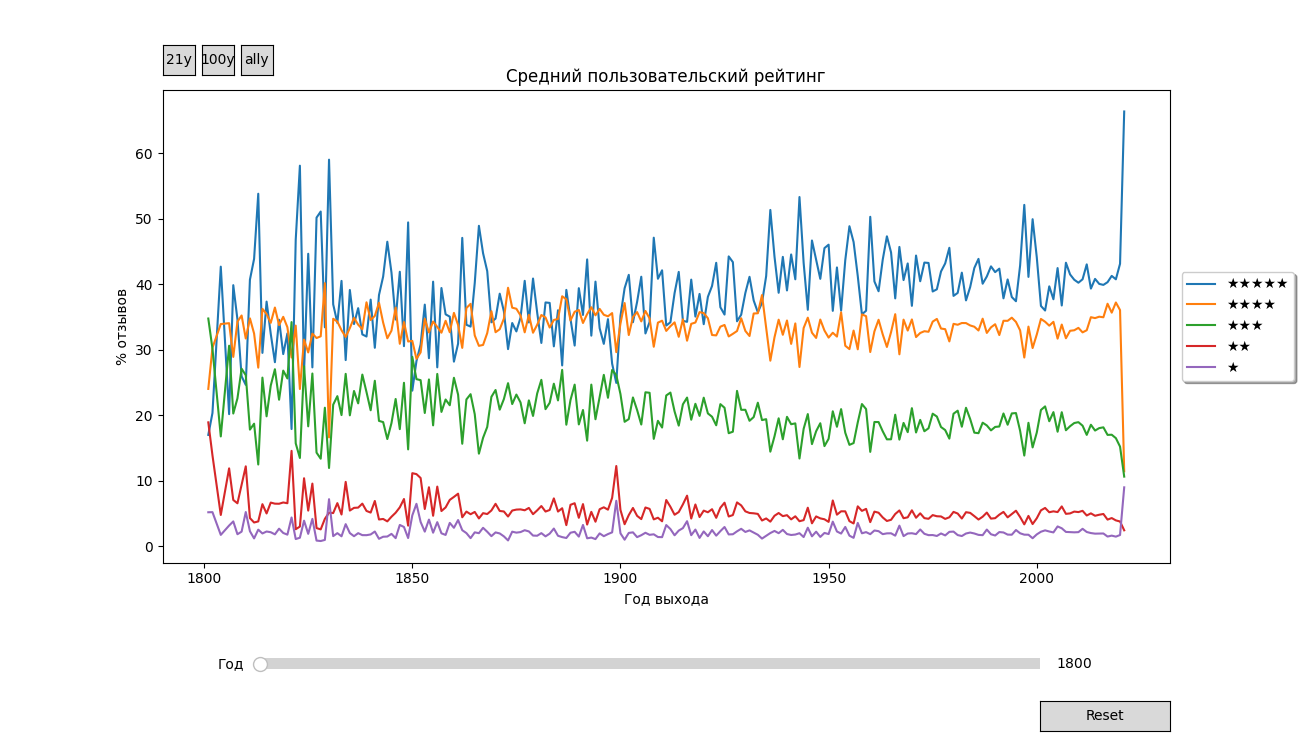

In [21]:
from matplotlib.widgets import Slider, Button

fig, ax = plt.subplots(figsize=(13, 7.5))
r5 = ax.plot(list(df_ratings.year_published),
             list(df_ratings.five_star_ratings), label = '★★★★★')
r4 = ax.plot(list(df_ratings.year_published),
             list(df_ratings.four_star_ratings), label = '★★★★')
r3 = ax.plot(list(df_ratings.year_published),
             list(df_ratings.three_star_ratings), label = '★★★')
r2 = ax.plot(list(df_ratings.year_published),
             list(df_ratings.two_star_ratings), label = '★★')
r1 = ax.plot(list(df_ratings.year_published),
             list(df_ratings.one_star_ratings), label = '★')
plt.xlabel("Год выхода")
plt.ylabel("% отзывов")
plt.title("Средний пользовательский рейтинг")
# plt.legend(loc='right', bbox_to_anchor = (1.3, 0.5))
leg = ax.legend(loc ='right', bbox_to_anchor = (1.13, 0.5), fancybox=True, shadow=True)

# adjust the main plot to make room for the sliders
fig.subplots_adjust(bottom=0.25)

ax_year = fig.add_axes([0.20, 0.1, 0.60, 0.03])
year_slider = Slider(
    ax=ax_year,
    label='Год',
    valmin=1800,
    valmax=2020,
    valinit=1800,
    valstep = 1,
)

lines = ax.get_lines()
lined = {}  # Will map legend lines to original lines.
for legline, origline in zip(leg.get_lines(), lines):
    legline.set_picker(7)  # Enable picking on the legend line.
    lined[legline] = origline

# The function to be called anytime a slider's value changes
def update(val):
    ax.clear()
    year = year_slider.val
    df_ratings_year = df_ratings[df_ratings.year_published >= year]
    r5 = ax.plot(list(df_ratings_year.year_published),
                 list(df_ratings_year.five_star_ratings), label = '★★★★★');
    r4 = ax.plot(list(df_ratings_year.year_published),
                 list(df_ratings_year.four_star_ratings), label = '★★★★');
    r3 = ax.plot(list(df_ratings_year.year_published),
                 list(df_ratings_year.three_star_ratings), label = '★★★');
    r2 = ax.plot(list(df_ratings_year.year_published),
                 list(df_ratings_year.two_star_ratings), label = '★★');
    r1 = ax.plot(list(df_ratings_year.year_published),
                 list(df_ratings_year.one_star_ratings), label = '★');
    leg = ax.legend(loc ='right', bbox_to_anchor = (1.13, 0.5), fancybox=True, shadow=True)
    ax.set_xlabel("Год выхода")
    ax.set_ylabel("% отзывов")
    ax.set_title("Средний пользовательский рейтинг")
    
    lines = ax.get_lines()
    for legline, origline in zip(leg.get_lines(), lines):
        legline.set_picker(7)  # Enable picking on the legend line.
        lined[legline] = origline
    
    fig.canvas.draw_idle()

def on_pick(event):
    # On the pick event, find the original line corresponding to the legend
    # proxy line, and toggle its visibility.
    legline = event.artist
    origline = lined[legline]
    visible = not origline.get_visible()
    origline.set_visible(visible)
    # Change the alpha on the line in the legend, so we can see what lines
    # have been toggled.
    legline.set_alpha(1.0 if visible else 0.2)
    # year_slider.set_cal(year_slider.val)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', on_pick)


# register the update function with each slider
year_slider.on_changed(update)

ax_21y = fig.add_axes([0.125, 0.9, 0.025, 0.04])
button_21y = Button(ax_21y, '21y', hovercolor='0.975')

ax_100y = fig.add_axes([0.155, 0.9, 0.025, 0.04])
button_100y = Button(ax_100y, '100y', hovercolor='0.975')

ax_ally = fig.add_axes([0.185, 0.9, 0.025, 0.04])
button_ally = Button(ax_ally, 'ally', hovercolor='0.975')

def clicked_w(year):
    def clicked(event):
        year_slider.set_val(year)
    return clicked

button_21y.on_clicked(clicked_w(year=2000))
button_100y.on_clicked(clicked_w(year=1920))
button_ally.on_clicked(clicked_w(year=1800))

resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button_reset = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    year_slider.reset()
button_reset.on_clicked(reset)

##### plotly
> Для корректного отображения в Jupyter Lab: https://stackoverflow.com/a/56777278

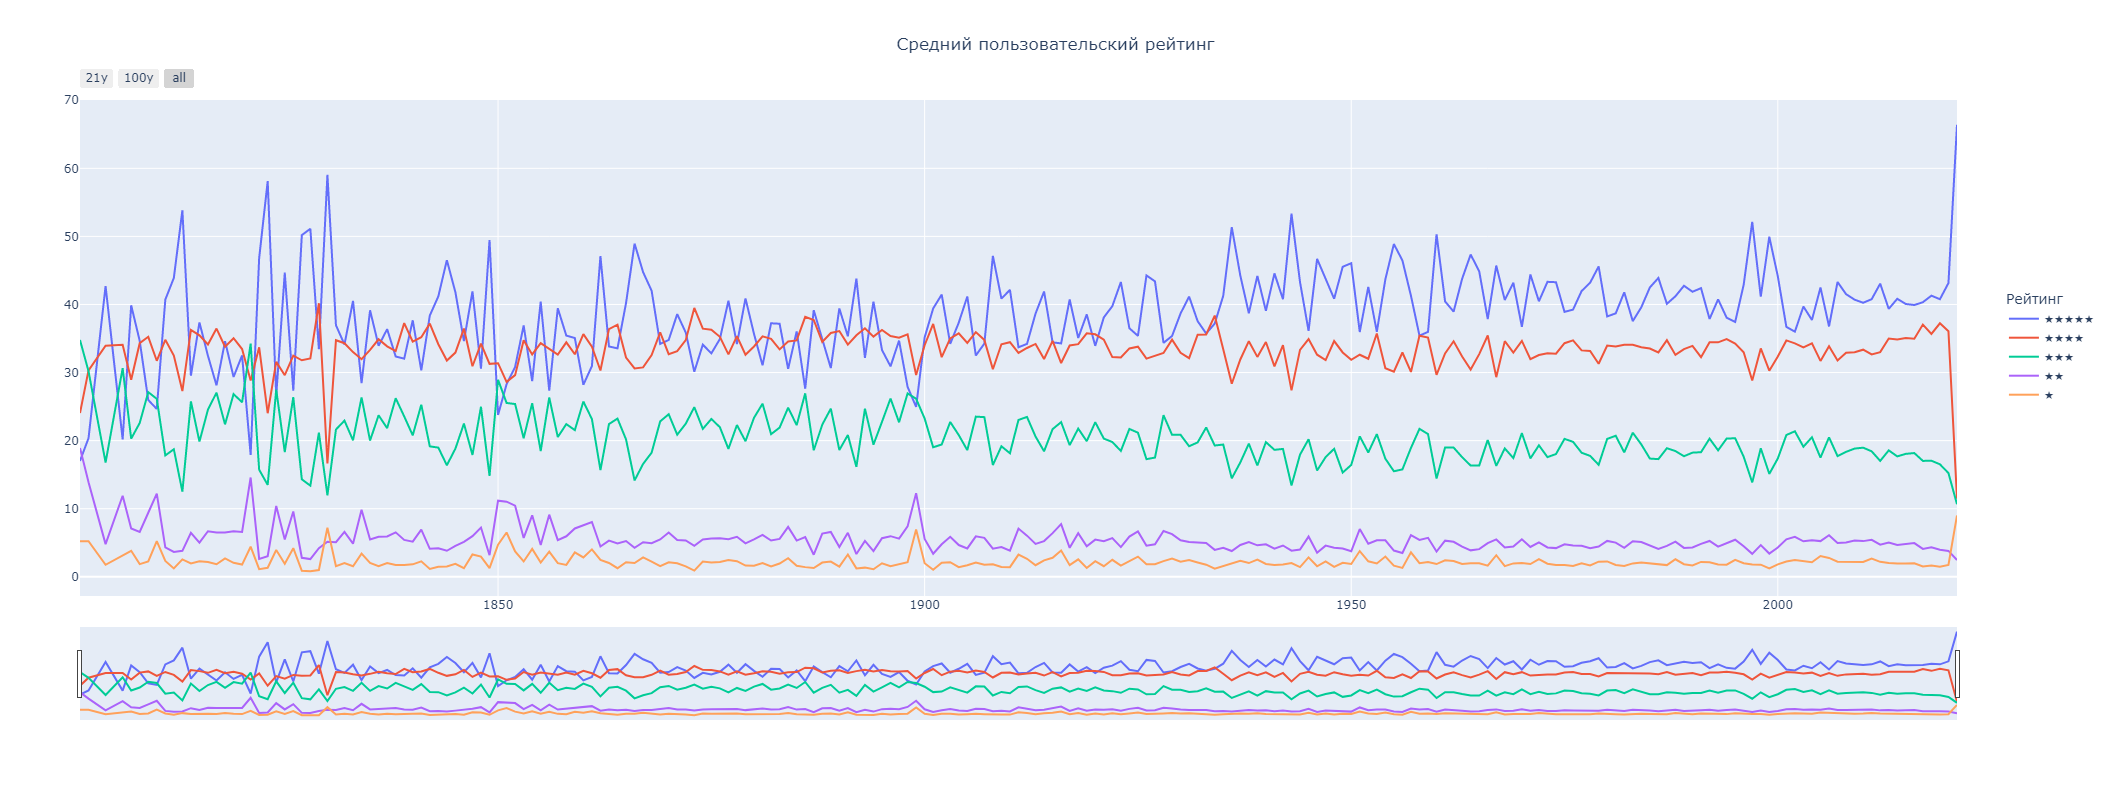

In [22]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
# import plotly.io as pio
# pio.renderers.default='notebook'

fig_1 = go.Figure()

fig_1.add_trace(
    go.Scatter(x=list(df_ratings.year_published), 
               y=list(df_ratings.five_star_ratings), name = '★★★★★'))
fig_1.add_trace(
    go.Scatter(x=list(df_ratings.year_published), 
               y=list(df_ratings.four_star_ratings), name = '★★★★'))
fig_1.add_trace(
    go.Scatter(x=list(df_ratings.year_published), 
               y=list(df_ratings.three_star_ratings), name = '★★★'))
fig_1.add_trace(
    go.Scatter(x=list(df_ratings.year_published), 
               y=list(df_ratings.two_star_ratings),name = '★★'))
fig_1.add_trace(
    go.Scatter(x=list(df_ratings.year_published), 
               y=list(df_ratings.one_star_ratings), name = '★'))

# Set title
fig_1.update_layout(
    title_text="Средний пользовательский рейтинг",
    title_x=0.5,
    legend_title="Рейтинг",
    legend = dict(orientation = "v", y = .5, x = 1.025)
)

# Add range slider
fig_1.update_layout(
    xaxis = dict(
        rangeselector = dict(
            buttons = list([
                dict(count = 21,
                     label = "21y",
                     step = "year",
                     stepmode = "backward"),
                dict(count = 100,
                     label = "100y",
                     step = "year",
                     stepmode = "backward"),
                dict(step = "all")
            ])
        ),
        rangeslider = dict(
            visible = True
        ),
        type = "date"
    ),
    autosize=False,
    width=1300,
    height=800,
)

fig_1.show()

##### pandas hist

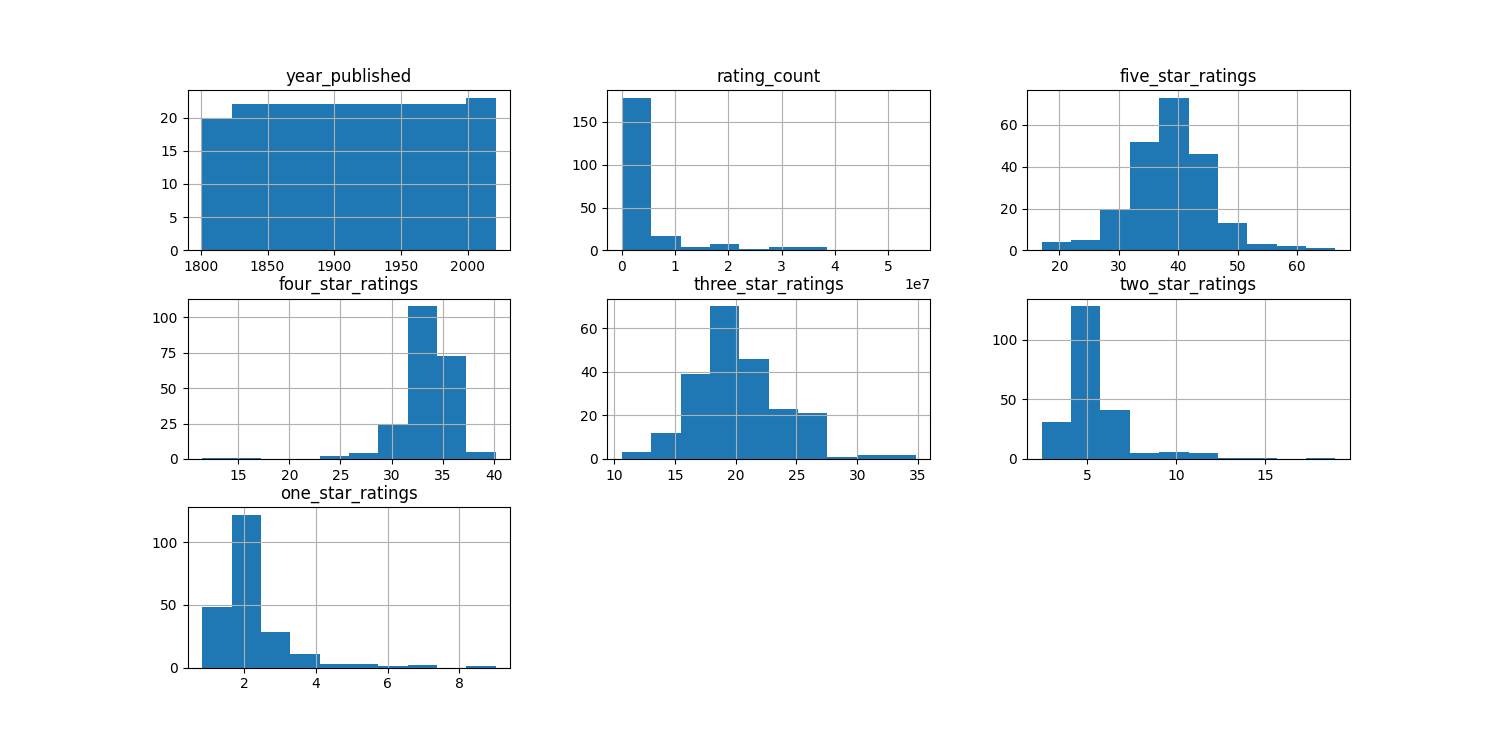

In [23]:
df_ratings.hist(figsize=(15, 7.5));

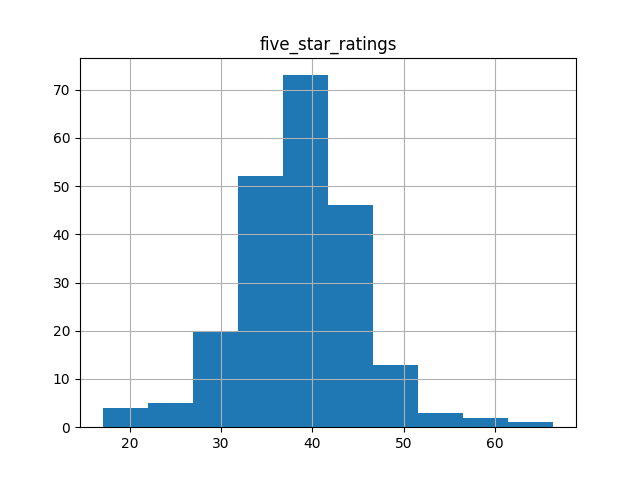

In [24]:
df_ratings.hist(column='five_star_ratings', bins = 10);

##### seaborn boxplot

KeyError: 0

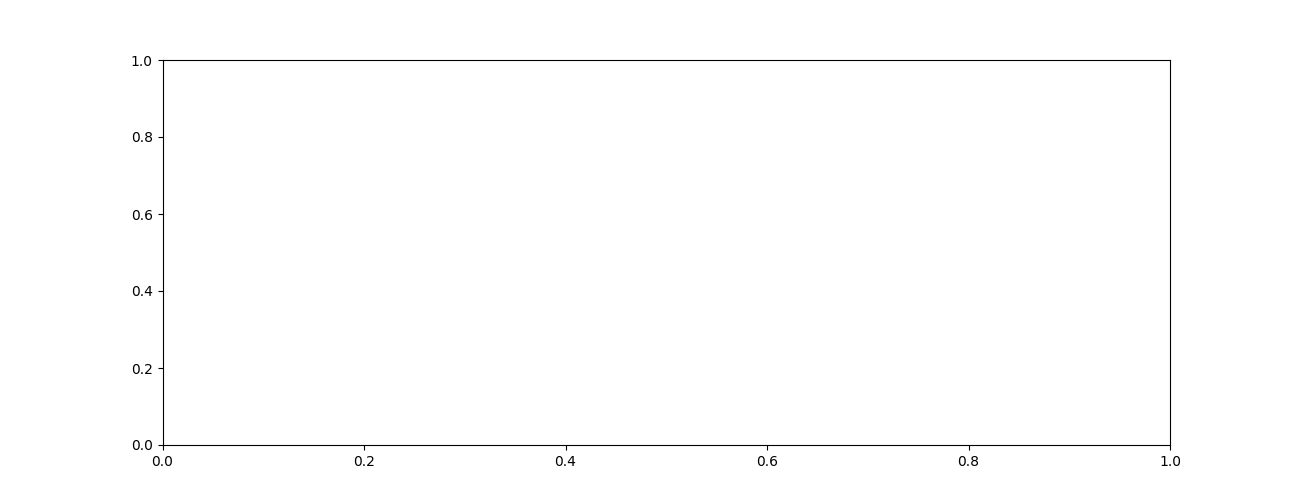

In [25]:
fig_sns, ax_sns = plt.subplots(figsize=(13, 5))
sns.boxplot(ax = ax_sns, data=df_ratings['five_star_ratings']);

In [26]:
import copy
dff = copy.deepcopy(df_ratings)
dff = dff.reset_index()
sns.boxplot(ax = ax_sns, data = dff['five_star_ratings'].values);

> [Getting Error 0 when plotting boxplot of a filtered dataset](https://stackoverflow.com/a/71423584)

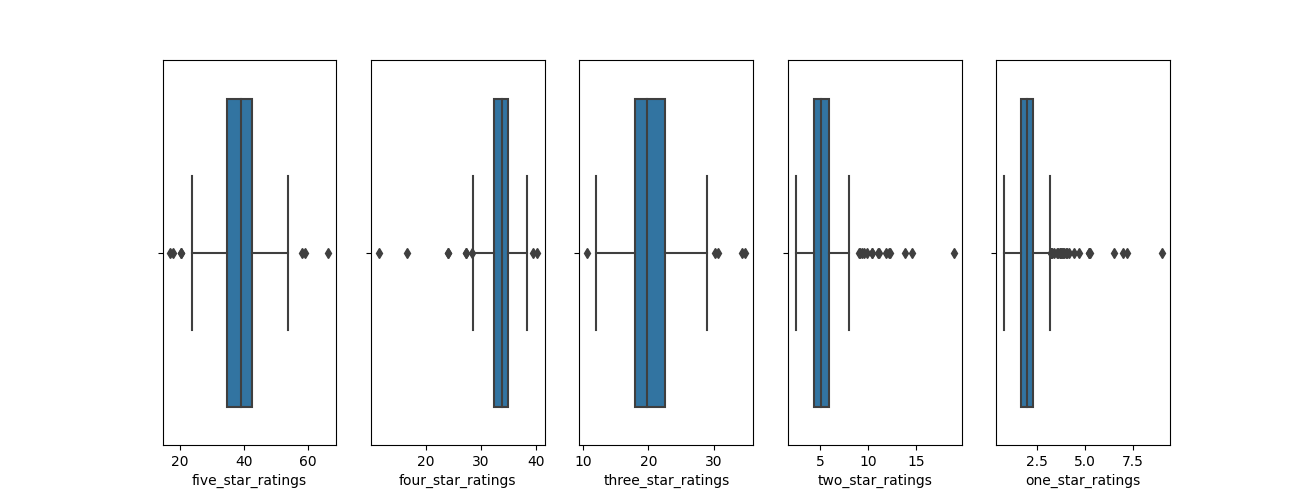

In [27]:
fig_sns, ax_sns = plt.subplots(1, 5, figsize=(13, 5))
sns.boxplot(ax=ax_sns[0], data=df_ratings, x='five_star_ratings');
sns.boxplot(ax=ax_sns[1], data=df_ratings, x='four_star_ratings');
sns.boxplot(ax=ax_sns[2], data=df_ratings, x='three_star_ratings');
sns.boxplot(ax=ax_sns[3], data=df_ratings, x='two_star_ratings');
sns.boxplot(ax=ax_sns[4], data=df_ratings, x='one_star_ratings');

##### Ящик с усами
[Wiki](https://ru.wikipedia.org/wiki/%D0%AF%D1%89%D0%B8%D0%BA_%D1%81_%D1%83%D1%81%D0%B0%D0%BC%D0%B8)  
![Ящик с усами](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/704px-Boxplot_vs_PDF.svg.png)

#### Категориальные признаки
##### Анализ жанров

In [28]:
genres = df['genre'].explode().value_counts().index.tolist()
genres[:10]

['Fiction',
 'Romance',
 'Fantasy',
 'YoungAdult',
 'Nonfiction',
 'Contemporary',
 'Historical-HistoricalFiction',
 'Mystery',
 'Classics',
 'Fantasy-Paranormal']

In [29]:
print(f"Жанров всего: {len(genres)}")

Жанров всего: 856


In [30]:
auth = df['author'].explode().value_counts().reset_index()
auth = auth[:10]
gen = df['genre'].explode().value_counts().reset_index()
gen = gen[:10]

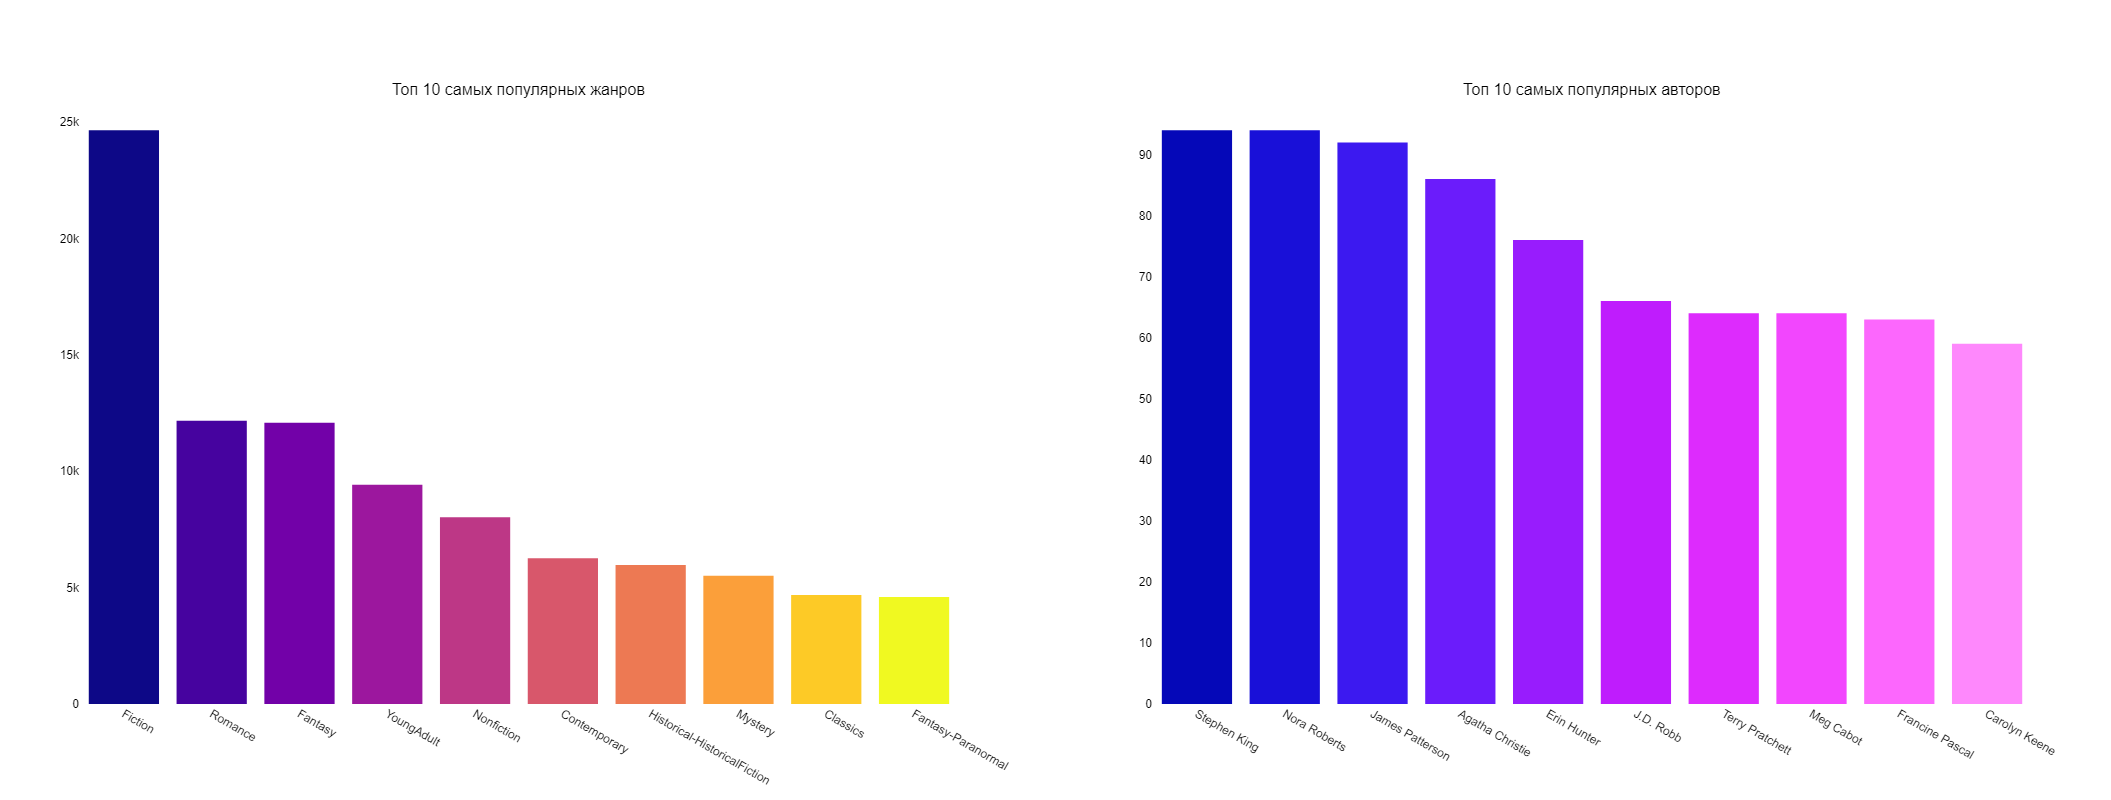

In [31]:
fig_2 = make_subplots(rows=1, cols=2,
                      specs=[[{'type': 'xy'}, {"type": "xy"}]],
                      subplot_titles=("Топ 10 самых популярных жанров", 
                                      "Топ 10 самых популярных авторов"))
# Setting Bar parameters
fig_2.add_trace(go.Bar(x=gen['index'], 
                       y=gen['genre'],
                       name ='Books',
                       marker_color=px.colors.sequential.Plasma),
                       row=1, col=1)
# Setting Bar parameters
fig_2.add_trace(go.Bar(x=auth['index'], 
                       y=auth['author'],
                       name ='Books',
                       marker_color=px.colors.sequential.Plotly3),
                       row=1, col=2)
# Setting the parameters of the chart when displaying
fig_2.update_traces(marker_line_width=0)

# Setting the parameters of the chart when displaying
fig_2.update_layout(showlegend=False, 
                    plot_bgcolor='rgba(0,0,0,0)',
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'),
                    autosize=False,
                    width=1300,
                    height=800,)

# Displaying the graph
fig_2.show()

##### Введем искусственный признак - тип серии (цикличность)

In [32]:
di = {1: 'Standalone', 2: 'Duology', 3: 'Trilogy'}
df['series_type'] = df['books_in_series_count'].map(di).fillna('Saga')

In [33]:
df['series_type']

0              Saga
1           Duology
2              Saga
3              Saga
4        Standalone
            ...    
52194    Standalone
52195    Standalone
52196    Standalone
52197          Saga
52198    Standalone
Name: series_type, Length: 48562, dtype: object

##### Распределение по типу серии

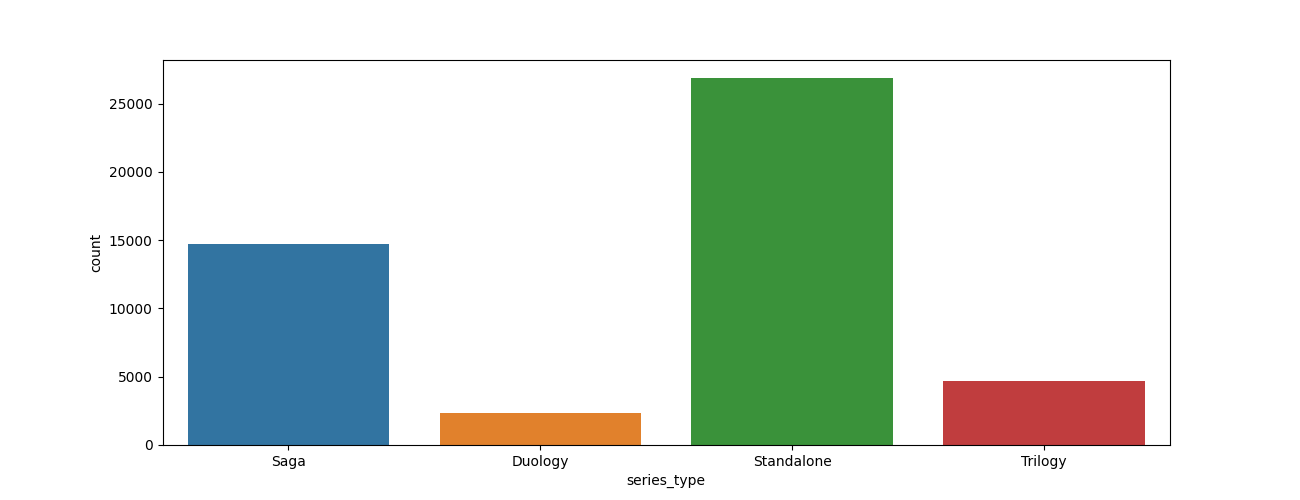

In [34]:
fig_sns, ax_sns = plt.subplots(figsize=(13, 5))
sns.countplot(ax=ax_sns, data=df, x='series_type');

##### Топ 10 издательств

In [35]:
pubs = df['publisher'].explode().value_counts().index.tolist()
pubs[:10]

['Vintage',
 'HarperCollins',
 'Penguin Books',
 'Ballantine Books',
 'Bantam',
 'Pocket Books',
 'Avon',
 'Del Rey',
 'Berkley',
 'Tor Books']

In [36]:
df['publisher'].value_counts().head(10)

Vintage             569
HarperCollins       559
Penguin Books       493
Ballantine Books    395
Bantam              373
Pocket Books        318
Avon                307
Del Rey             287
Berkley             287
Tor Books           282
Name: publisher, dtype: int64

In [37]:
pubs_i = df['publisher'].value_counts().head(10).index
pubs_i

Index(['Vintage', 'HarperCollins', 'Penguin Books', 'Ballantine Books',
       'Bantam', 'Pocket Books', 'Avon', 'Del Rey', 'Berkley', 'Tor Books'],
      dtype='object')

In [38]:
df_pubs = df[df['publisher'].isin(pubs_i)]
df_pubs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3870 entries, 3 to 52183
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3870 non-null   int64  
 1   title                  3870 non-null   object 
 2   series                 2104 non-null   object 
 3   author                 3870 non-null   object 
 4   rating_count           3870 non-null   int64  
 5   review_count           3870 non-null   int64  
 6   average_rating         3870 non-null   float64
 7   five_star_ratings      3870 non-null   int64  
 8   four_star_ratings      3870 non-null   int64  
 9   three_star_ratings     3870 non-null   int64  
 10  two_star_ratings       3870 non-null   int64  
 11  one_star_ratings       3870 non-null   int64  
 12  number_of_pages        3844 non-null   float64
 13  publisher              3870 non-null   object 
 14  genre                  3870 non-null   object 
 15  isb

##### Количество книг в топ 10 издательств

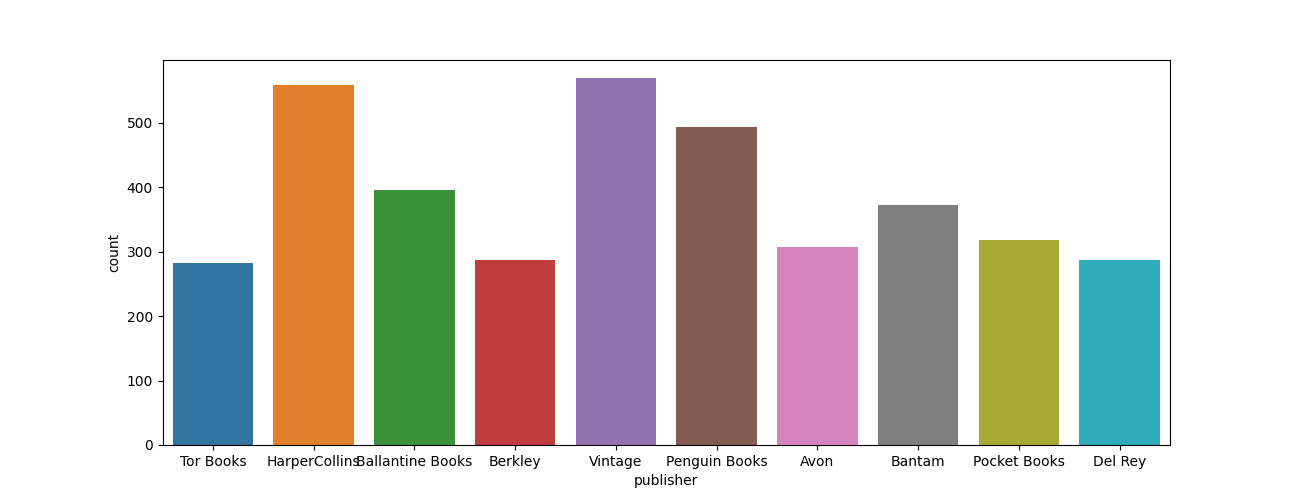

In [39]:
fig_sns, ax_sns = plt.subplots(figsize=(13, 5))
sns.countplot(ax=ax_sns, data=df_pubs, x='publisher');

##### Количество книг в топ 10 издательств по типу серии

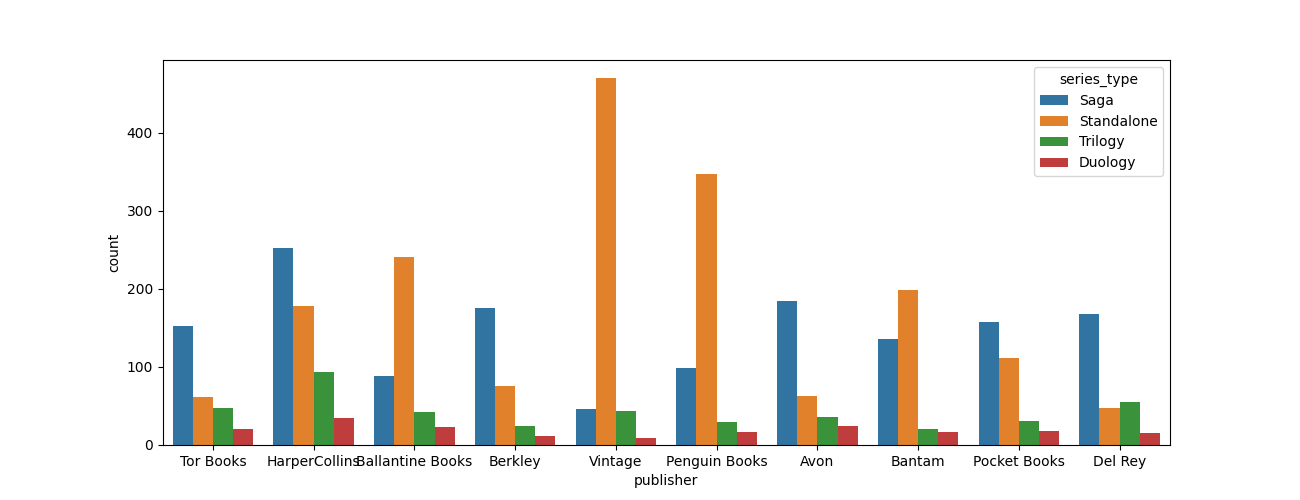

In [40]:
fig_sns, ax_sns = plt.subplots(figsize=(13, 5))
sns.countplot(ax=ax_sns, data=df_pubs, x='publisher', hue='series_type');

In [41]:
df_grouped_by_pub = df.groupby('publisher') \
    .agg({'title':'count', 
          'average_rating':'mean', 
          'rating_count': 'sum'}) \
    .reset_index()

In [42]:
df_pub_popular = df_grouped_by_pub.sort_values(by=['rating_count'], ascending=False)[:10]
df_pub_popular

,publisher,title,average_rating,rating_count
6335,Penguin Books,493,3.955436,25439700
5004,"Little, Brown and Company",177,3.880169,21155025
8740,Vintage,569,3.939789,14314933
7402,Scholastic Press,162,4.085679,14186630
7427,Scribner,165,3.913030,13617858
6357,Penguin Classics,263,3.937452,13457344
846,Bantam,373,3.974129,13307327
824,Ballantine Books,395,3.959747,12543216
3754,HarperCollins,559,4.065081,11690798
3407,Grand Central Publishing,261,3.953946,11158290


##### Топ 10 издательств по количеству оценок в определенном жанре

In [43]:
def barplot_by_genre(genre):
    mask = [genre in x for x in df['genre']]
    newframe = df[mask]
    df_grouped_by_pub = newframe.groupby('publisher') \
       .agg({'title':'count', 'average_rating':'mean', 'rating_count': 'sum'}) \
       .reset_index()
    df_popular = df_grouped_by_pub.sort_values(by=['rating_count'], ascending=False)[:10]
    barplot = px.bar(data_frame = df_popular,
                     x = 'publisher',
                     y = 'rating_count',
                     labels = {'publisher': 'Издательство', 'rating_count': 'Количество оценок', 'average_rating': 'Рейтинг'},
                     color = 'average_rating',
                     opacity = 0.9,
                     orientation = 'v',
                     barmode = 'relative',
                     title = f"Топ 10 издательств по количеству оценок в жанре \"{genre}\"",
                    )
    barplot.layout.update(autosize=False,                          
                          width=1300,
                          height=800,
                          title_x = 0.5)
    barplot
    barplot.show()

In [44]:
interact(barplot_by_genre, genre=genres, df = fixed(df));

interactive(children=(Dropdown(description='genre', options=('Fiction', 'Romance', 'Fantasy', 'YoungAdult', 'N…

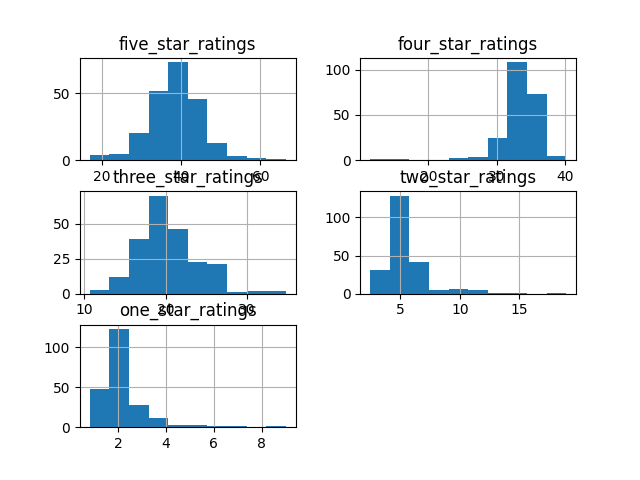

In [45]:
feat = [f for f in df.columns if 'star' in f]
df_ratings[feat].hist();

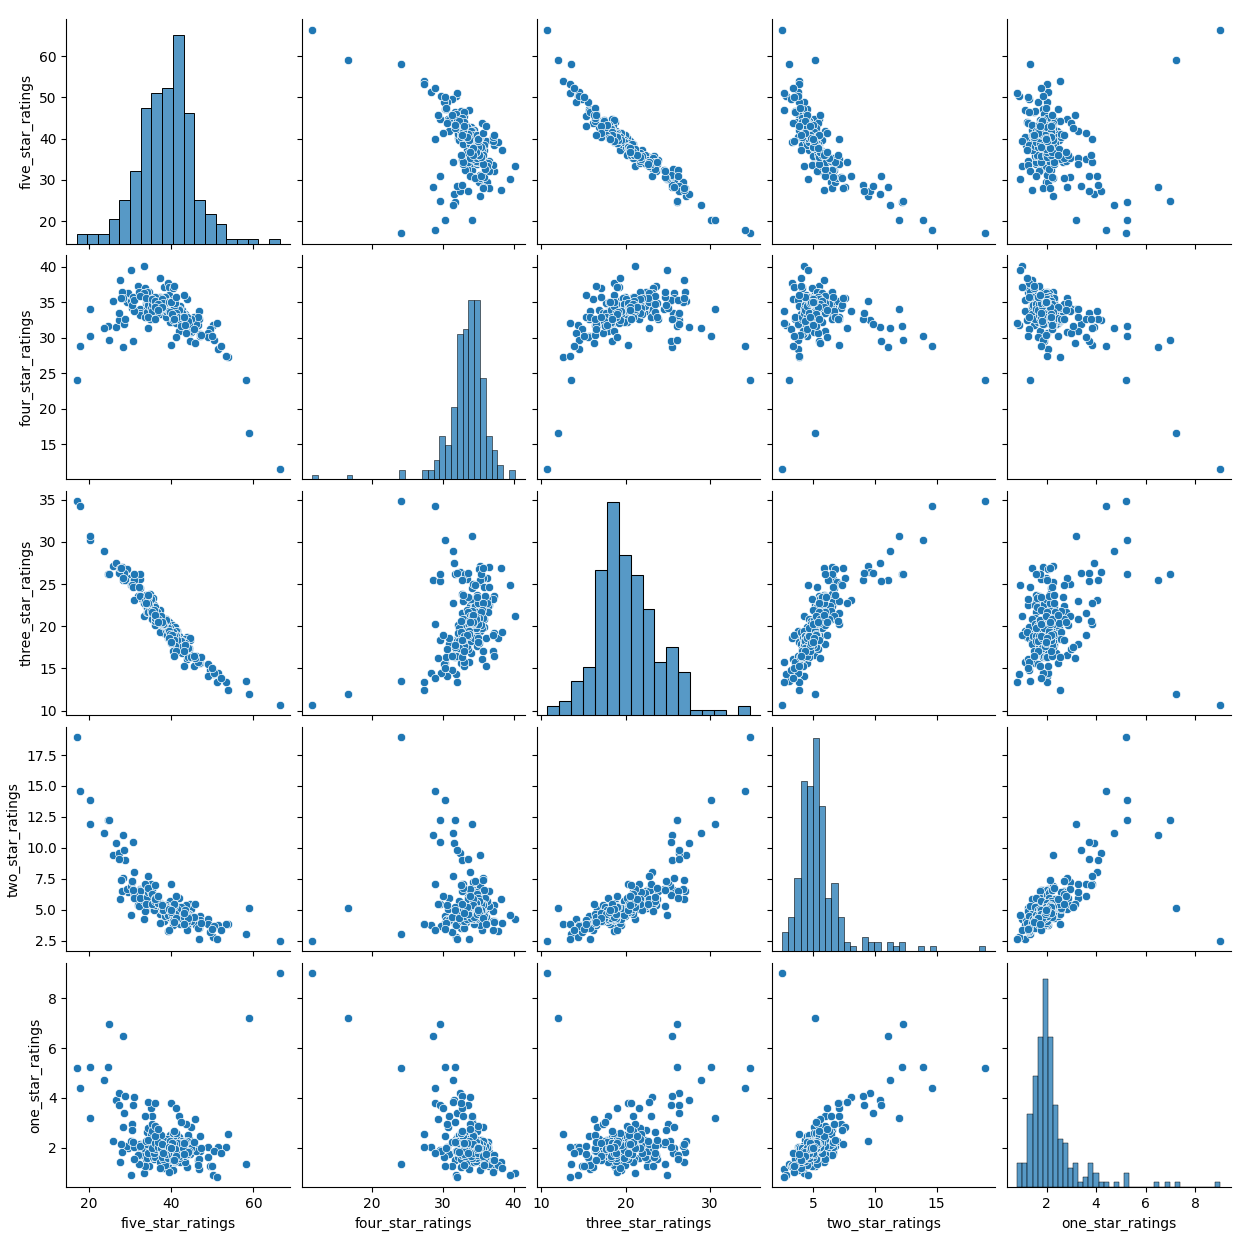

In [46]:
sns.pairplot(height=2.5, data=df_ratings[feat]);

##### Связь рейтинга книги с количеством страниц и количеством сиквелов

In [47]:
series_type_anno = [('Любая', 'All'), ('Отдельная', 'Standalone'), 
                    ('Дилогия', 'Duology'), ('Трилогия', 'Trilogy'), 
                    ('Цикл', 'Saga')]
series_type_dict = dict()
for t in series_type_anno:
    series_type_dict[t[1]] = t[0]

toggle = widgets.ToggleButtons(options=series_type_anno,
                               description='Цикличность:',
                               disabled=False,
                               button_style='',
                               tooltips=['Любое количество книг',
                                        'Отдельная книга', 
                                        'Две книги в цикле', 
                                        'Три книги в цикле', 
                                        'Больше книг богу книг']
                                )
def making_pages(df, toggle, label):
    df_pages = df[df['number_of_pages'] <= 1500].copy()
    if not toggle == 'All':
        mask = [toggle in x for x in df_pages['series_type']]
        colour = 'rating_count'
    else:
        mask = [True for x in df_pages['series_type']]
        colour = 'series_type'
    title = f"Зависимость рейтинга от количества страниц для цикличности \"{label}\""
    fig = px.scatter(df_pages[mask], 
                     x="number_of_pages", 
                     y="rating_count",
                     labels = {"number_of_pages": 'Количество страниц', "rating_count": 'Количество оценок', 
                               "review_count": 'Количество рецензий', "series_type": 'Цикличность'},
                     size='review_count', 
                     color="review_count",
                     hover_data=['title', 'author'], 
                     facet_col="series_type",
                     title = title
                    )
    # Меняем названия subplot'ов
    fig.for_each_annotation(lambda a: a.update(text = series_type_dict[a.text.split('=')[1]]))
    # Меняем названия рядов в легенде
    # fig.for_each_trace(lambda t: t.update(name = series_type_dict[t.name],
    #                                       legendgroup = series_type_dict[t.name],
    #                                       hovertemplate = t.hovertemplate.replace(t.name, series_type_dict[t.name.split('=')[1]])
    #                                      ) if t.name != '' else '')
    
    fig.layout.update(autosize=False, 
                      width=1300,
                      height=400,
                      title_x = 0.5)
    fig.show()
    
    df_scat = df_pages[mask].groupby(['year_published', 'series_type']) \
        .agg({'average_rating' : 'mean', 
              'rating_count' : 'sum', 
              'review_count' : 'sum'}) \
        .reset_index()
    df_scat = df_scat[df_scat.year_published > 1950]
    title = f"Средняя оценка для цикличности \"{label}\" c 1950 по 2021 гг."
    fig = px.scatter(df_scat, 
                     y="average_rating", 
                     x="year_published",
                     labels = {"average_rating": 'Средняя оценка', "year_published": 'Год выхода', "series_type": 'Цикличность', "rating_count": 'Количество оценок'},
                     log_x=True, 
                     log_y=True, 
                     color=colour, 
                     size="rating_count",
                     title = title)
    fig.layout.update(autosize=False, 
                      width=1300,
                      height=400,
                      title_x = 0.5)
    fig.show()

In [48]:
interact(making_pages, toggle = toggle, label = toggle.label, df=fixed(df));

interactive(children=(ToggleButtons(description='Цикличность:', options=(('Любая', 'All'), ('Отдельная', 'Stan…

In [49]:
df.corr()

,id,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,year_published,books_in_series_count,awards_count
id,1.000000,-0.018870,0.055714,0.140992,-0.013166,-0.018841,-0.030453,-0.025056,-0.017077,-0.023812,0.250141,-0.051632,-0.010081
rating_count,-0.018870,1.000000,0.831896,0.033575,0.970995,0.986749,0.937906,0.854123,0.758821,0.031390,-0.040727,0.010896,0.362991
review_count,0.055714,0.831896,1.000000,0.024583,0.778147,0.853200,0.808335,0.737092,0.618566,0.041081,0.008871,-0.016929,0.478139
average_rating,0.140992,0.033575,0.024583,1.000000,0.056972,0.029730,-0.010951,-0.033353,-0.020523,0.146987,0.024327,0.165207,-0.008471
five_star_ratings,-0.013166,0.970995,0.778147,0.056972,1.000000,0.931121,0.829844,0.723096,0.652092,0.033541,-0.031668,0.017074,0.348821
four_star_ratings,-0.018841,0.986749,0.853200,0.029730,0.931121,1.000000,0.959334,0.862487,0.733489,0.031012,-0.042099,0.008962,0.368648
three_star_ratings,-0.030453,0.937906,0.808335,-0.010951,0.829844,0.959334,1.000000,0.958384,0.831717,0.022540,-0.054645,0.002224,0.339277
two_star_ratings,-0.025056,0.854123,0.737092,-0.033353,0.723096,0.862487,0.958384,1.000000,0.936248,0.020109,-0.049732,-0.009856,0.300122
one_star_ratings,-0.017077,0.758821,0.618566,-0.020523,0.652092,0.733489,0.831717,0.936248,1.000000,0.019594,-0.033319,-0.007701,0.257341
number_of_pages,-0.023812,0.031390,0.041081,0.146987,0.033541,0.031012,0.022540,0.020109,0.019594,1.000000,-0.025069,0.035776,0.034995


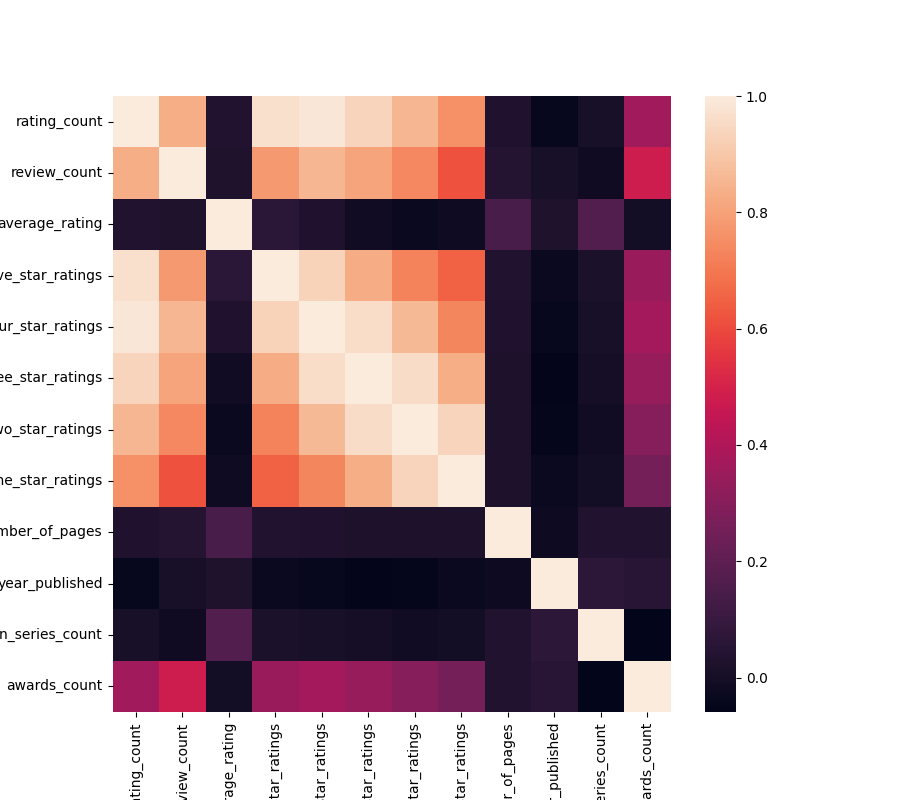

In [50]:
fig_sns, ax_sns = plt.subplots(figsize=(9, 8))
sns.heatmap(ax = ax_sns, data = df[df.columns[~df.columns.isin(['id'])]].corr());

In [51]:
for item in ax_sns.get_xticklabels():
    item.set_rotation(25)
for item in ax_sns.get_yticklabels():
    item.set_rotation(30)
fig_sns.canvas.draw_idle()

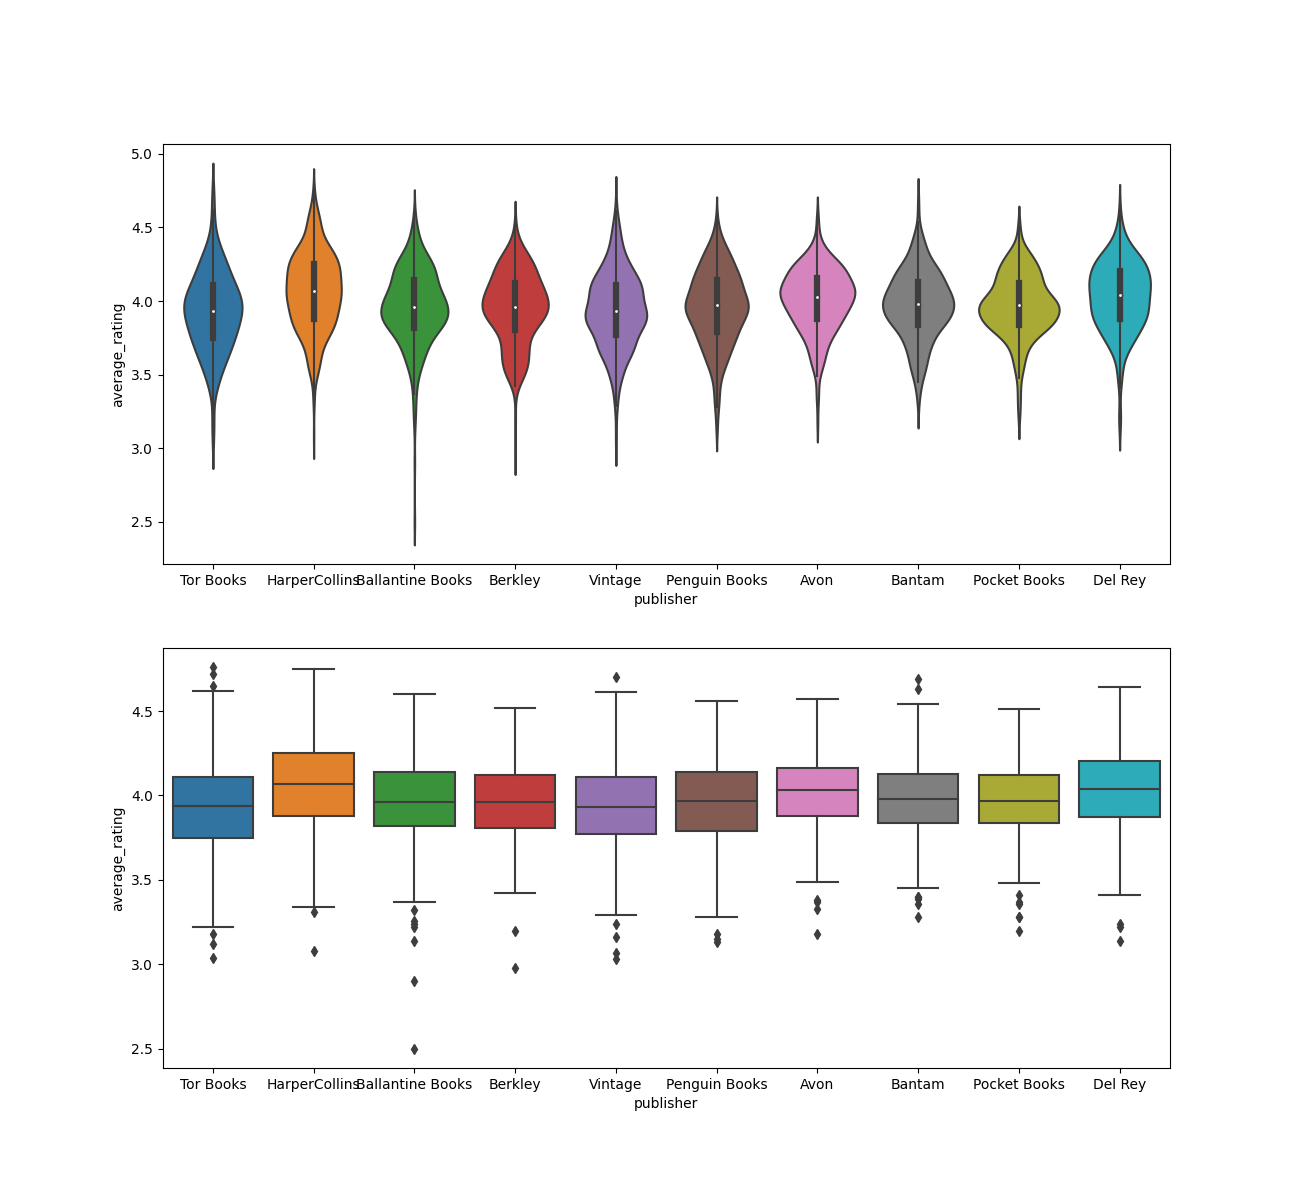

In [52]:
fig_sns, ax_sns = plt.subplots(2, 1, figsize=(13, 12))
sns.violinplot(ax = ax_sns[0], data = df_pubs, x = 'publisher', y = 'average_rating');
sns.boxplot(ax = ax_sns[1], data = df_pubs, x = 'publisher', y = 'average_rating');

#### QQ-график
Графики Q-Q (квантиль-квантиль) сравнивают два распределения вероятностей путем построения совместных квантилей. График Q-Q используется для сравнения форм распределений, обеспечивая графическое представление того, насколько подобны или различны положение, масштаб и асимметрия двух распределений.

С помощью него определяем насколько числовой признак похож на нормальное распределение. Поскольку целый ряд методов статистики предполагают, что распределение признака нормальное. QQ-график — один из способов проверить нормальность распределения.

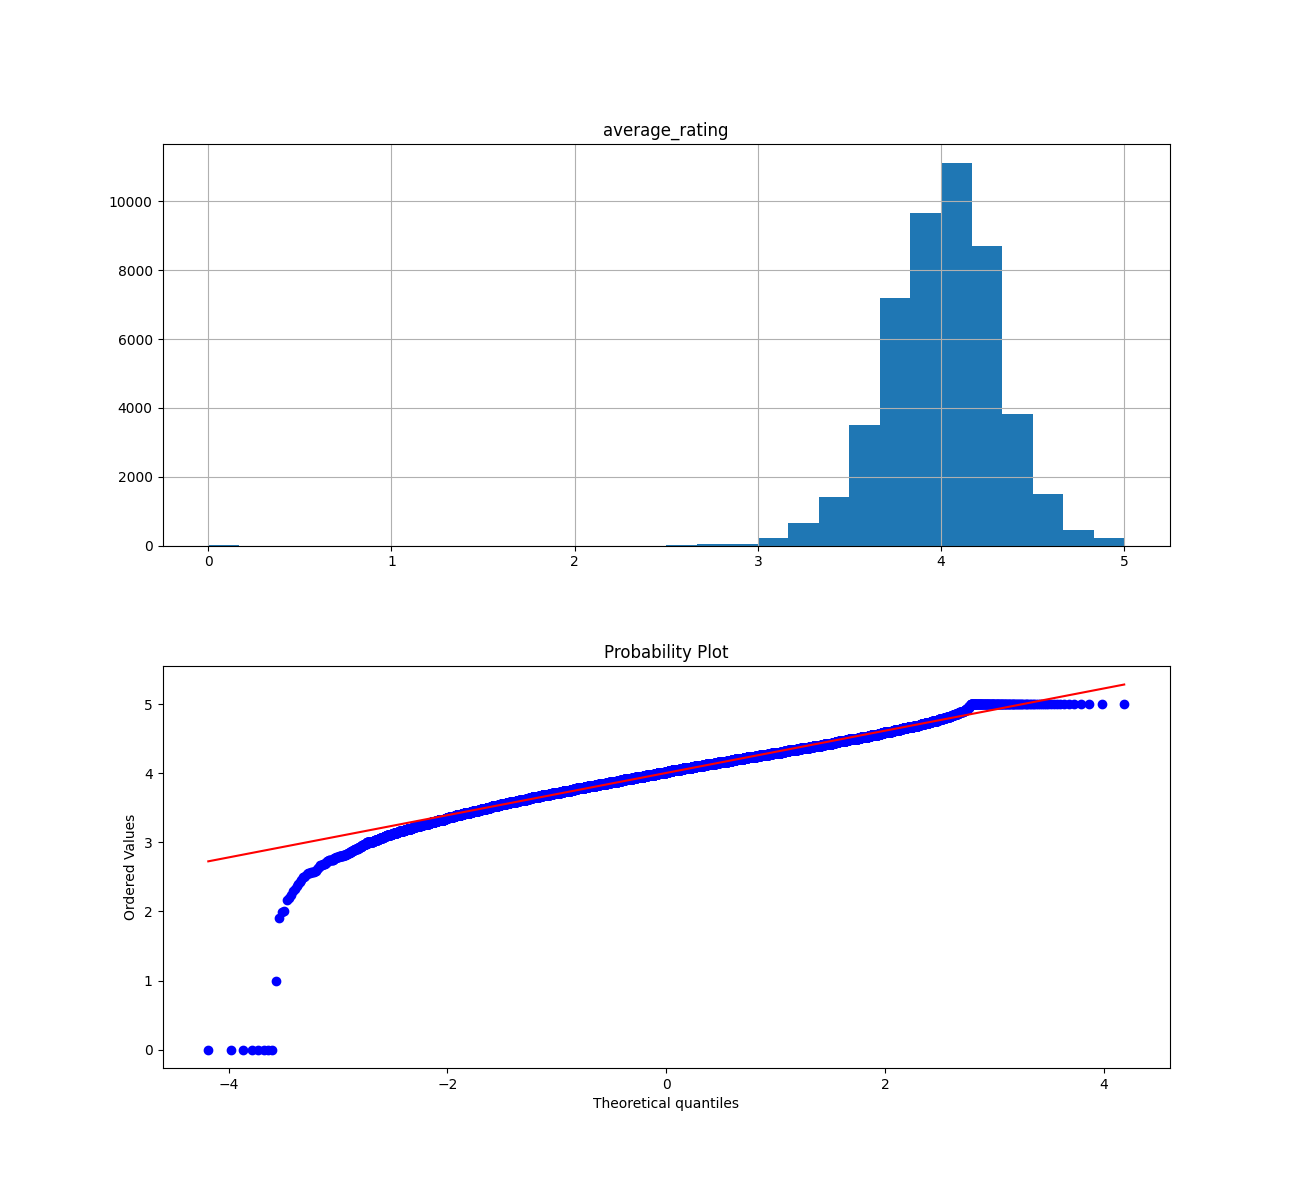

In [53]:
from scipy import stats

fig_p, ax_p = plt.subplots(2, 1, figsize=(13, 12))
stats.probplot( df['average_rating'], dist="norm", plot=plt)
plt.subplot(2,1,2)
df.hist(ax = ax_p[0], column = 'average_rating', bins = 30 )
plt.show()

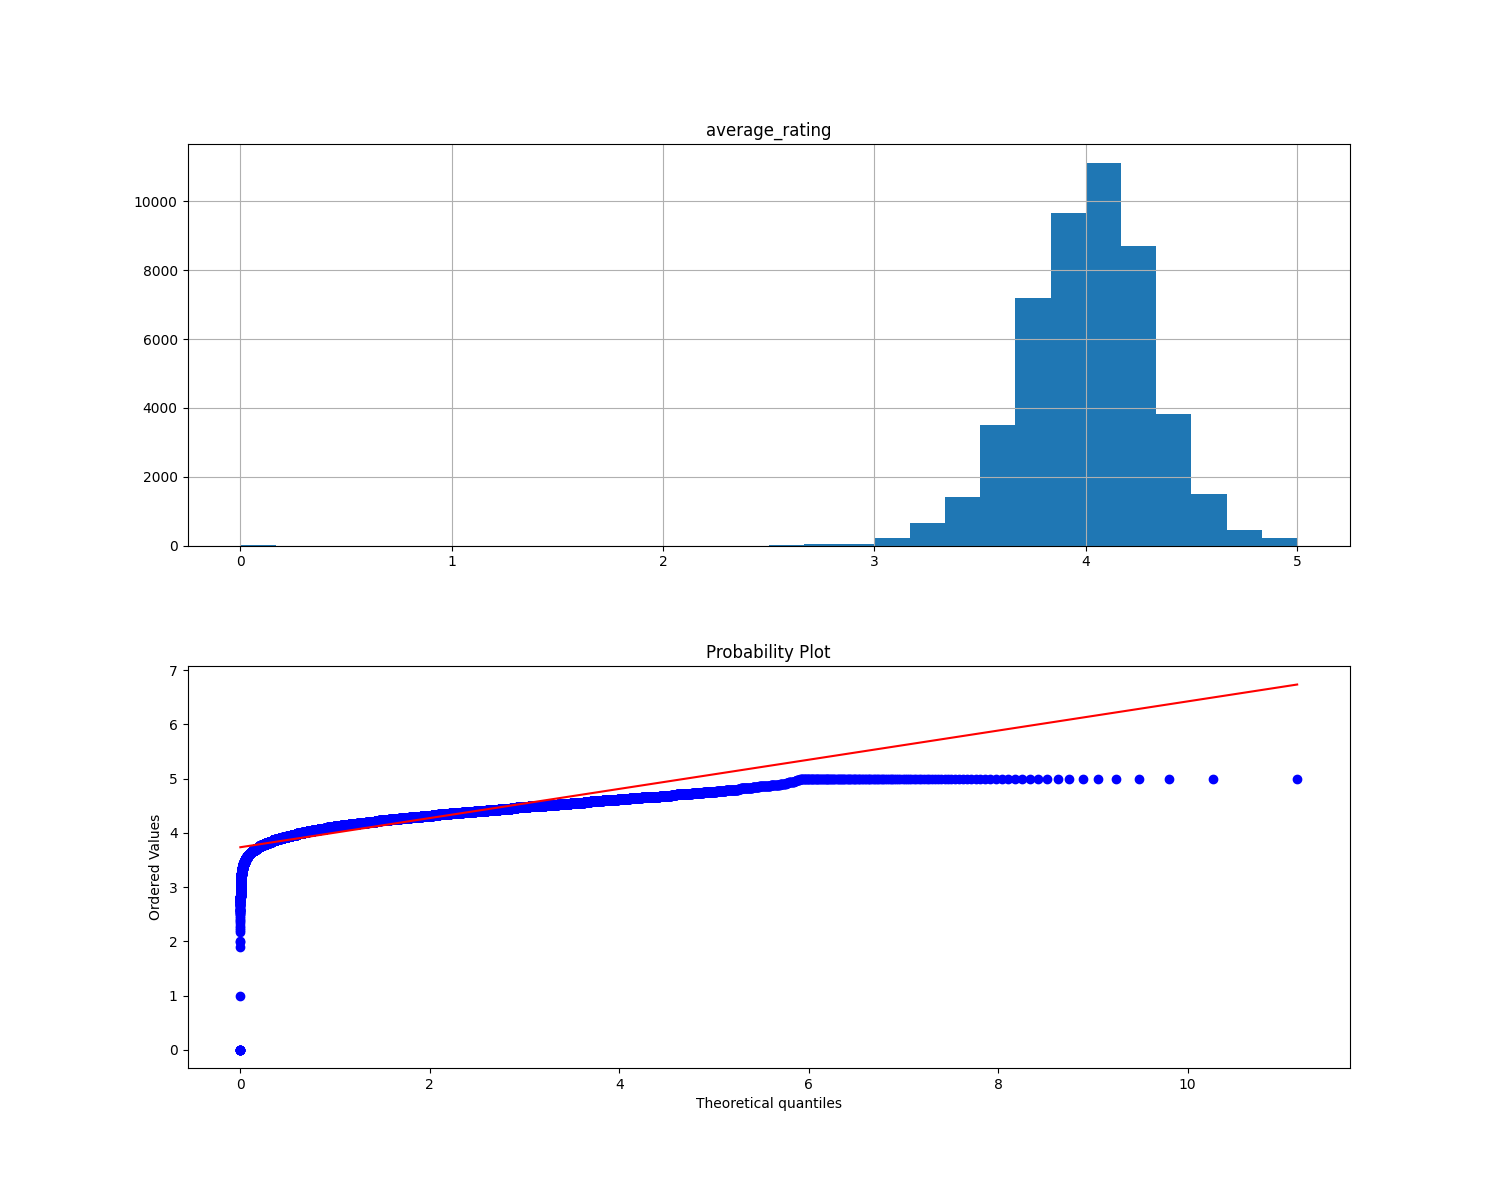

In [54]:
from scipy import stats

fig_p, ax_p = plt.subplots(2, 1, figsize=(15, 12))
stats.probplot( df['average_rating'], dist=stats.expon, plot=plt)
plt.subplot(2,1,2)
df.hist(ax = ax_p[0], column = 'average_rating', bins = 30 )
plt.show()

### Экспорт в растровый и векторный форматы
DPI - dots per inch - разрешение нашего рисунка, количество точек на дюйм. Пришло из полиграфии. "Физический" размер рисунка может оставаться таким же, а изменение `dpi` приведет к изменению размера рисунка на бумаге или в документе. 300 dpi достаточно для печати. Соответственно, комбинация `figsize=(w, h)` и `dpi=n` задает искомый размер (в документе размер рисунка можно поправить, и визуально качество не ухудшится, а вот на печати это скажется при апскейле) и разрешение (для печати и отображения).  
Рисунки, содержащие графики, желательно экспортировать в векторный формат, чтобы не страдало качество печати.

#### matplotlib

In [55]:
# Сохранение в растровый формат, matplotlib
fig.savefig(Path(data_path, 'ratings_by_year_300.png'), dpi=300)
fig.savefig(Path(data_path, 'ratings_by_year_600.png'), dpi=600)

In [56]:
# Сохранение в векторный формат, matplotlib
fig.savefig(Path(data_path, 'ratings_by_year.svg'), dpi=300)

#### plotly
В `plotly` нет явного параметра `dpi`, есть только размер в пикселах и параметр `scale`.
Необходимо установить `kaleido`. Однако, последняя версия не работает, см. [Not able to save plotly plots using to_image or write_image](https://stackoverflow.com/questions/70997997/not-able-to-save-plotly-plots-using-to-image-or-write-image).
```bash
pip install kaleido==0.1.0post1
```

In [58]:
# Сохранение в растровый формат, plotly
import plotly
plotly.io.kaleido.scope.mathjax=None
fig_2.write_image(Path(data_path, 'top10_authors_and_genres.png'), format='png',engine='kaleido')

In [59]:
# Сохранение в векторный формат, plotly
fig_2.write_image(Path(data_path, 'top10_authors_and_genres.svg'))